# Linear models - practice session

Let's begin with quickly importing the packages we will need here.

In [17]:
!pip install scikit-learn
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

You should consider upgrading via the '/home/tspisak/src/RPN-signature/venv/bin/python -m pip install --upgrade pip' command.


Next, we continue with our example dataset and plot the association between age and the volume of the right superior frontal cortex again.

<AxesSubplot:xlabel='Age', ylabel='rh_superiorfrontal_volume'>

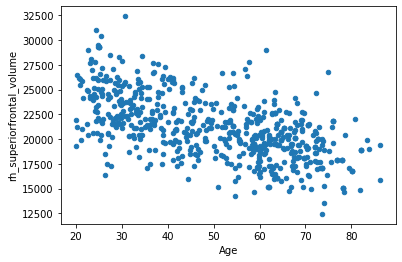

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv")
df.plot.scatter(x='Age', y='rh_superiorfrontal_volume')

Let's fit a linear model with the python package '[scipy](https://scipy.org/)' to assess the strength of the correlation.

In [27]:
beta1, beta0, r_value, p_value, std_err = stats.linregress(x=df['Age'],y=df['rh_superiorfrontal_volume'])
print('R =', r_value, ' p = ', p_value)

R = -0.5855297900642413  p =  5.617381835888532e-60


Note that `linregress` also obtained the beta coefficients from the equation:

$$
y_{i}=\beta _{0}+\beta _{1}x_{{i}}+\varepsilon _{i}
$$

In [28]:
beta0, beta1

(26628.385095049118, -109.14655975487544)